# For later use

In [1]:
def visualize_grid(grid, title):
    """Visualizes the grid using matplotlib."""
    matrix = np.array(grid).reshape(5, 5)
    color_map = {"green": "green", "black": "black", "beige": "tan"}
    matrix_colors = np.vectorize(color_map.get)(matrix)

    fig, ax = plt.subplots()
    for i in range(5):
        for j in range(5):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=matrix_colors[i, j], edgecolor='black'))

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(0.5, 5, 1))
    ax.set_yticks(np.arange(0.5, 5, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(title)
    plt.show()

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Make check_deut_grids func

In [4]:
def assign_duet_colors():
    # Create two 5x5 beige grids
    grid1 = ["beige"] * 25
    grid2 = ["beige"] * 25
    
    # Randomly place 9 green tiles in grid1
    all_positions = list(range(25))
    green_positions = random.sample(all_positions, 9)
    for pos in green_positions:
        grid1[pos] = "green"
    
    # Randomly select 3 of those green positions and copy to grid2
    shared_green_positions = random.sample(green_positions, 3)
    for pos in shared_green_positions:
        grid2[pos] = "green"
    
    # Get remaining beige positions in grid1
    beige_positions_grid1 = [pos for pos in range(25) if grid1[pos] == "beige"]
    
    # Place 6 more green tiles in grid2 by selecting from beige positions in grid1
    additional_green_positions = random.sample(beige_positions_grid1, 6)
    for pos in additional_green_positions:
        grid2[pos] = "green"
        
    # Place first two black tiles in grid1:
    # One where grid2 has green (but grid1 has beige)
    available_green_in_grid2 = [pos for pos in range(25) 
                               if grid2[pos] == "green" and grid1[pos] == "beige"]
    black1_pos = random.choice(available_green_in_grid2)
    grid1[black1_pos] = "black"
    
    # One where grid2 has beige
    available_beige_in_grid2 = [pos for pos in range(25) 
                               if grid2[pos] == "beige" and grid1[pos] == "beige"]
    black2_pos = random.choice(available_beige_in_grid2)
    grid1[black2_pos] = "black"
    
    # Place first two black tiles in grid2:
    # One where grid1 has green (but grid2 has beige)
    available_green_in_grid1 = [pos for pos in range(25) 
                               if grid1[pos] == "green" and grid2[pos] == "beige"]
    black3_pos = random.choice(available_green_in_grid1)
    grid2[black3_pos] = "black"
    
    # One where grid1 has beige
    available_beige_in_grid1 = [pos for pos in range(25) 
                               if grid1[pos] == "beige" and grid2[pos] == "beige"]
    black4_pos = random.choice(available_beige_in_grid1)
    grid2[black4_pos] = "black"
    
    # Find common beige positions and place shared black tile
    common_beige = [pos for pos in range(25) 
                   if grid1[pos] == "beige" and grid2[pos] == "beige"]
    shared_black = random.choice(common_beige)
    grid1[shared_black] = "black"
    grid2[shared_black] = "black"
    
    return grid1, grid2

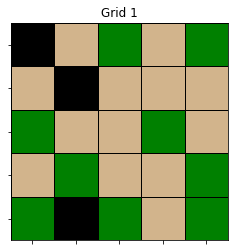

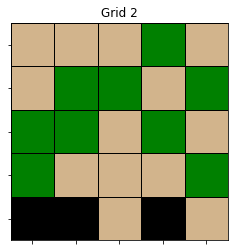

Grids generated successfully!


In [6]:
grid1, grid2 = assign_duet_colors()

if grid1 and grid2:
    visualize_grid(grid1, "Grid 1")
    visualize_grid(grid2, "Grid 2")
    print("Grids generated successfully!")
    
# Test the function
grid1, grid2 = assign_duet_colors()

In [10]:
def check_grids(grid1, grid2):
    # Check total counts for each grid
    for grid_num, grid in enumerate([grid1, grid2], 1):
        counts = {
            "green": grid.count("green"),
            "black": grid.count("black"),
            "beige": grid.count("beige")
        }
        if counts["green"] != 9:
            return False, f"Grid {grid_num} has {counts['green']} green tiles instead of 9"
        if counts["black"] != 3:
            return False, f"Grid {grid_num} has {counts['black']} black tiles instead of 3"
        if counts["beige"] != 13:
            return False, f"Grid {grid_num} has {counts['beige']} beige tiles instead of 13"
    
    # Check shared green tiles
    shared_greens = sum(1 for i in range(25) if grid1[i] == "green" and grid2[i] == "green")
    if shared_greens != 3:
        return False, f"Found {shared_greens} shared green tiles instead of 3"
    
    # Check shared black tiles
    shared_blacks = sum(1 for i in range(25) if grid1[i] == "black" and grid2[i] == "black")
    if shared_blacks != 1:
        return False, f"Found {shared_blacks} shared black tiles instead of 1"
    
    # Check black-green correspondence
    grid1_unique_blacks = [i for i in range(25) if grid1[i] == "black" and grid2[i] != "black"]
    grid2_unique_blacks = [i for i in range(25) if grid2[i] == "black" and grid1[i] != "black"]
    
    # Check each unique black in grid1 corresponds to either green or beige in grid2
    for pos in grid1_unique_blacks:
        if grid2[pos] not in ["green", "beige"]:
            return False, f"Black tile in grid1 at position {pos} doesn't correspond to green or beige in grid2"
    
    # Check each unique black in grid2 corresponds to either green or beige in grid1
    for pos in grid2_unique_blacks:
        if grid1[pos] not in ["green", "beige"]:
            return False, f"Black tile in grid2 at position {pos} doesn't correspond to green or beige in grid1"
    
    # Check that at least one unique black corresponds to green in the other grid
    grid1_black_to_green = any(grid2[pos] == "green" for pos in grid1_unique_blacks)
    grid2_black_to_green = any(grid1[pos] == "green" for pos in grid2_unique_blacks)
    
    if not grid1_black_to_green:
        return False, "No black tile in grid1 corresponds to a green tile in grid2"
    if not grid2_black_to_green:
        return False, "No black tile in grid2 corresponds to a green tile in grid1"
    
    return True, "All rules satisfied"

# Test multiple trials
num_trials = 10000
results = []
for i in range(num_trials):
    grid1, grid2 = assign_duet_colors()
    is_valid, message = check_grids(grid1, grid2)
    results.append(is_valid)
    if not is_valid:
        print(f"Trial {i+1} failed: {message}")

success_rate = sum(results) / num_trials * 100
print(f"\nSuccess rate over {num_trials} trials: {success_rate}%")


Success rate over 10000 trials: 100.0%


In [16]:
import pywhatkit
import time
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

def save_grid_as_image(grid, title, flip=False):
    """Saves the grid visualization as a JPEG image file"""
    if flip:
        matrix = np.array(grid).reshape(5, 5)[::-1]  # Flip rows
    else:
        matrix = np.array(grid).reshape(5, 5)
    
    color_map = {"green": "green", "black": "black", "beige": "tan"}
    matrix_colors = np.vectorize(color_map.get)(matrix)

    fig, ax = plt.subplots()
    for i in range(5):
        for j in range(5):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=matrix_colors[i, j], edgecolor='black'))

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(0.5, 5, 1))
    ax.set_yticks(np.arange(0.5, 5, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(title)
    
    # Save as JPEG instead of PNG
    plt.savefig(f"{title}.jpg")
    plt.close()

def send_whatsapp_image(phone_number, image_path, message=""):
    try:
        # Send the image
        pywhatkit.sendwhats_image(
            receiver=phone_number,
            img_path=image_path,
            caption=message,
            wait_time=15
        )
        print(f"Image will be sent to {phone_number}")
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

def main():
    # Generate grids
    grid1, grid2 = assign_duet_colors()
    
    # Save images
    save_grid_as_image(grid1, "Thomas Grid")
    save_grid_as_image(grid2, "Elena's grid", flip=True)
    
     # Phone numbers in international format
    your_number = "+447379401250"  # Your number
    gf_number = "+34648552964"    # Your girlfriend's number
    
    
    # Send images
    send_whatsapp_image(your_number, "grid1.jpg", "Here's your grid!")  # Changed extension to .jpg
    time.sleep(30)  # Wait between sends
    send_whatsapp_image(gf_number, "grid2.jpg", "Here's your grid!")    # Changed extension to .jpg
    
    # Clean up image files
    os.remove("grid1.jpg")  # Changed extension to .jpg
    os.remove("grid2.jpg")  # Changed extension to .jpg

if __name__ == "__main__":
    main()

2024-12-26 15:01:25.643 osascript[15032:10825990] CFURLGetFSRef was passed a URL which has no scheme (the URL will not work with other CFURL routines)


Image will be sent to +447379401250


2024-12-26 15:02:12.566 osascript[15076:10826723] CFURLGetFSRef was passed a URL which has no scheme (the URL will not work with other CFURL routines)


Image will be sent to +34648552964
